In [3]:
%matplotlib inline
# %config InlineBackend.figure_format = ‘retina’
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper
import numpy as np
import pandas as pd

In [4]:
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

In [5]:
path = './faces1'
dataset = datasets.ImageFolder(path, transform=transform)

In [6]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [7]:
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

In [8]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [9]:
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

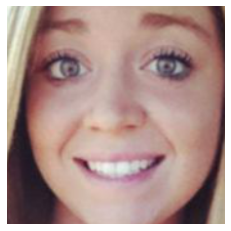

In [10]:
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

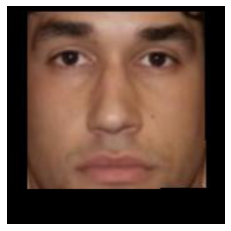

In [11]:
data_dir = path
transform = transforms.Compose([transforms.Resize(255),
        transforms.CenterCrop(224),
        transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

In [12]:
import shutil
import os, random
pathToDir = "faces1/trainDir/"
DIR = 'faces1/trainDir'
lengthOfDir = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

for i in range(lengthOfDir//5):
    randFile = random.choice(os.listdir(pathToDir))
    shutil.move(pathToDir+ randFile, 'faces1/testDir/'+ randFile)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'faces1/trainDir'

684.0

In [13]:
#Applying Transformation
data_dir = './faces1/'
train_transforms = transforms.Compose([
                                transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])
train_data = datasets.ImageFolder(data_dir + 'train',  
                                    transform=train_transforms)                                       
test_data = datasets.ImageFolder(data_dir + 'test', 
                                    transform=test_transforms)
#Data Loading
trainloader = torch.utils.data.DataLoader(train_data,
                                                   batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [14]:
train_data

Dataset ImageFolder
    Number of datapoints: 2736
    Root Location: ./faces1/train
    Transforms (if any): Compose(
                             RandomRotation(degrees=(-30, 30), resample=False, expand=False)
                             RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                         )
    Target Transforms (if any): None

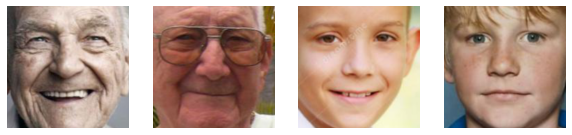

In [15]:
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize = (10,4), ncols = 4)

for i in range(4):
    ax = axes[i]
    imshow(images[i], ax = ax, normalize = False)

In [17]:
df = pd.read_csv("landmark_list_part1.csv", header=None) 
namesDf = df[0].astype(str)
firstName = namesDf[0].split(' ')[0]
namesList = firstName.split('_')
namesList

['1', '0', '2', '20161219140530307.jpg']

In [18]:
imgIDlist = []
ageList = []
sexList = []
raceList = []
for row in namesDf:
    imgID = row.split(' ')[0]
    imgIDlist.append(imgID)
    ageList.append(imgID.split('_')[0])
    sexList.append(imgID.split('_')[1]) 
    raceList.append(imgID.split('_')[2])

In [19]:
sexList = ['M' if x == '0' else 'F' for x in sexList]

raceDict = {'0':'White', '1':'Black', '2':'Asian', '3':'Indian', '4':'Other'}
raceList = [raceDict.get(n, n) for n in raceList]

# data = [imgIDlist, ageList, sexList, raceList] 
data = {'ID':imgIDlist, 'Age':ageList, 'Sex':sexList, 'Race': raceList} 

In [20]:
labelsDF = pd.DataFrame(data)
labelsDF

,ID,Age,Sex,Race
0,1_0_2_20161219140530307.jpg,1,M,Asian
1,1_0_2_20161219140525218.jpg,1,M,Asian
2,1_0_2_20161219140540938.jpg,1,M,Asian
3,6_1_2_20161219140554092.jpg,6,F,Asian
4,1_1_2_20161219140604000.jpg,1,F,Asian
...,...,...,...,...
9775,36_0_0_20170112003914754.jpg,36,M,White
9776,31_0_2_20170112003835278.jpg,31,M,Asian
9777,24_0_2_20170112003933482.jpg,24,M,Asian
9778,20_1_2_20170112003857668.jpg,20,F,Asian


In [21]:
imageTest = 'faces1/UTKFace/'+ labelsDF.ID[0] +'.chip.jpg'
imageTest

'faces1/UTKFace/1_0_2_20161219140530307.jpg.chip.jpg'

In [22]:
def getFaceFilePath(inputID):
    return 'faces1/UTKFace/'+ inputID +'.chip.jpg'
def getFaceFileName(inputID):
    return inputID +'.chip.jpg'

In [23]:
imageTest = getFaceFilePath(labelsDF.ID[0])
imageTest

'faces1/UTKFace/1_0_2_20161219140530307.jpg.chip.jpg'

Race: Asian


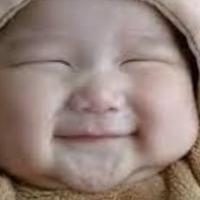

In [24]:
from IPython.display import Image
# Image(filename=imageTest)
race = labelsDF.loc[labelsDF["ID"] == labelsDF.ID[0]].Race[0]
raceString = 'Race: ' + race
print(raceString)
Image(filename=imageTest)


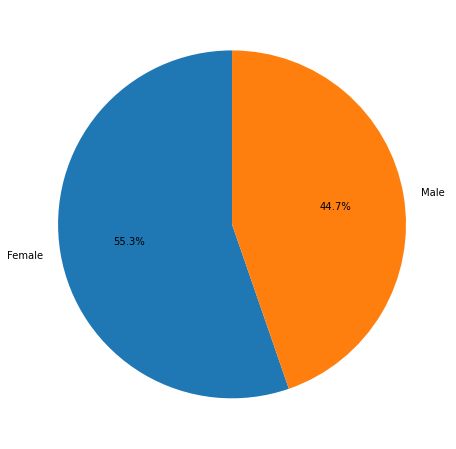

In [25]:
label = 'Female', 'Male'
plt.figure(figsize = (8,8))
plt.pie(labelsDF.groupby('Sex').size(), labels = label, autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

In [26]:
dropList = ['20170109142408075.jpg', '20170109150557335.jpg']
labelsDF = labelsDF[~labelsDF['Race'].isin(dropList)]

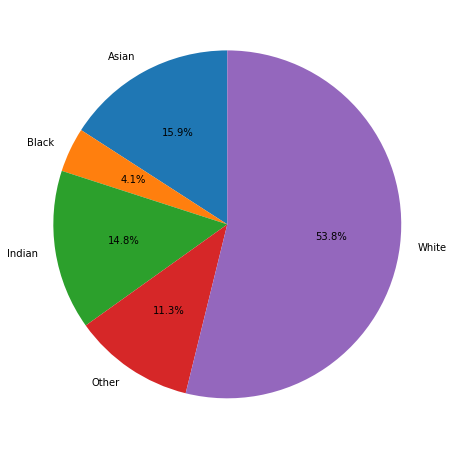

In [27]:
races = 'Asian', 'Black', 'Indian', 'Other', 'White'
plt.figure(figsize = (8,8))
plt.pie(labelsDF.groupby('Race').size(), labels = races, autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

In [28]:
labelsDF.Race.value_counts()

White     5265
Asian     1553
Indian    1452
Other     1103
Black      405
Name: Race, dtype: int64

In [30]:
# train_transform = transforms.Compose([transforms.ToPILImage(),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize(means,std)])

# test_transform = transforms.Compose([transforms.ToPILImage(),
#                                      transforms.ToTensor(),
#                                      transforms.Normalize(means,std)])

# valid_transform = transforms.Compose([transforms.ToPILImage(),
#                                      transforms.ToTensor(),
#                                      transforms.Normalize(means,std)])

In [157]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

In [193]:
from os import listdir
trainFilesNames = listdir("./faces1/train/trainDir")
testFilesNames = listdir("./faces1/test/testDir")

testFilesNames

['100_0_0_20170112215240346.jpg.chip.jpg',
 '101_0_0_20170112213500903.jpg.chip.jpg',
 '10_0_0_20170110220546177.jpg.chip.jpg',
 '10_0_0_20170110221719390.jpg.chip.jpg',
 '10_0_0_20170110224524253.jpg.chip.jpg',
 '10_0_0_20170110225252799.jpg.chip.jpg',
 '10_0_0_20170110225414790.jpg.chip.jpg',
 '10_0_0_20170110225502403.jpg.chip.jpg',
 '10_0_0_20170110225601897.jpg.chip.jpg',
 '10_0_0_20170117175625724.jpg.chip.jpg',
 '10_0_1_20170110220523360.jpg.chip.jpg',
 '10_0_1_20170110223848885.jpg.chip.jpg',
 '10_0_1_20170110225339066.jpg.chip.jpg',
 '10_0_1_20170116225209209.jpg.chip.jpg',
 '10_0_4_20161221192738446.jpg.chip.jpg',
 '10_0_4_20170103200335831.jpg.chip.jpg',
 '10_1_0_20170103200654246.jpg.chip.jpg',
 '10_1_0_20170109203512075.jpg.chip.jpg',
 '10_1_0_20170109203759972.jpg.chip.jpg',
 '10_1_0_20170109203924076.jpg.chip.jpg',
 '10_1_0_20170109204255055.jpg.chip.jpg',
 '10_1_0_20170109204259563.jpg.chip.jpg',
 '10_1_0_20170109204338404.jpg.chip.jpg',
 '10_1_0_20170109204422889.jpg.c

In [197]:
entries = []
trainDF = pd.DataFrame([], columns=['ID', 'Age', 'Sex', 'Race'])
testDF = pd.DataFrame([], columns=['ID', 'Age', 'Sex', 'Race'])

for idName in labelsDF.ID.to_list():
    fullID = getFaceFileName(idName)
    if fullID in trainFilesNames:
        entry = labelsDF.loc[labelsDF['ID'] == idName]
        trainDF = trainDF.append(entry)
#         print('yes')
    elif fullID in testFilesNames:
        entry = labelsDF.loc[labelsDF['ID'] == idName]
        testDF = testDF.append(entry)
#         print('no')
testDF

,ID,Age,Sex,Race
4,1_1_2_20161219140604000.jpg,1,F,Asian
7,1_1_2_20161219140638264.jpg,1,F,Asian
14,1_0_2_20161219140744200.jpg,1,M,Asian
37,1_0_2_20161219141101408.jpg,1,M,Asian
77,1_0_2_20161219141824081.jpg,1,M,Asian
...,...,...,...,...
9176,17_1_1_20170109214110957.jpg,17,F,Black
9178,18_1_0_20170109205411880.jpg,18,F,White
9186,18_1_0_20170109212647587.jpg,18,F,White
9188,18_1_0_20170109212814819.jpg,18,F,White


In [162]:
labelsDF.ID.to_list()

['1_0_2_20161219140530307.jpg',
 '1_0_2_20161219140525218.jpg',
 '1_0_2_20161219140540938.jpg',
 '6_1_2_20161219140554092.jpg',
 '1_1_2_20161219140604000.jpg',
 '1_0_0_20161219140623097.jpg',
 '1_0_0_20161219140627985.jpg',
 '1_1_2_20161219140638264.jpg',
 '1_0_0_20161219140642920.jpg',
 '2_1_2_20161219140650888.jpg',
 '2_1_2_20161219140706417.jpg',
 '2_0_2_20161219140712432.jpg',
 '4_1_2_20161219140718600.jpg',
 '2_1_2_20161219140736641.jpg',
 '1_0_2_20161219140744200.jpg',
 '1_0_2_20161219140748280.jpg',
 '1_0_2_20161219140756601.jpg',
 '1_1_2_20161219140803696.jpg',
 '1_0_2_20161219140811232.jpg',
 '3_1_2_20161219140825328.jpg',
 '3_1_2_20161219140828120.jpg',
 '2_1_2_20161219140833880.jpg',
 '2_1_2_20161219140840080.jpg',
 '2_0_2_20161219140845808.jpg',
 '2_1_2_20161219140853880.jpg',
 '2_0_2_20161219140905480.jpg',
 '1_0_2_20161219140913256.jpg',
 '5_0_2_20161219140923888.jpg',
 '1_0_2_20161219140929864.jpg',
 '4_0_2_20161219140938368.jpg',
 '2_1_2_20161219140944855.jpg',
 '1_0_2_

In [198]:
train, valid_data = train_test_split(trainDF, stratify=trainDF.Sex, test_size=0.2)

In [199]:
num_epochs = 35
num_classes = 2
batch_size = 25
learning_rate = 0.001
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [200]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=0)

In [201]:
train

,ID,Age,Sex,Race
8674,1_1_0_20170109194146279.jpg,1,F,White
4543,17_1_3_20170104221840229.jpg,17,F,Indian
2284,14_1_2_20170103200931103.jpg,14,F,Asian
944,1_1_2_20161219220631367.jpg,1,F,Asian
3237,21_1_2_20170104021056028.jpg,21,F,Asian
...,...,...,...,...
9147,16_1_0_20170109214342165.jpg,16,F,White
404,1_0_2_20161219162626830.jpg,1,M,Asian
1334,1_0_3_20161220215945524.jpg,1,M,Indian
5511,14_0_0_20170110232523770.jpg,14,M,White


In [132]:
valid_data

,ID,Age,Sex,Race
7973,51_1_0_20170109010116440.jpg,51,F,White
1342,1_1_3_20161220220046801.jpg,1,F,Indian
4741,29_1_3_20170104232640192.jpg,29,F,Indian
7094,18_1_0_20170109214813691.jpg,18,F,White
9146,16_1_0_20170109214333355.jpg,16,F,White
...,...,...,...,...
8964,10_1_0_20170109204859493.jpg,10,F,White
3359,33_0_0_20170104165541073.jpg,33,M,White
5404,10_0_0_20170110225035898.jpg,10,M,White
9363,42_1_0_20170109140758891.jpg,42,F,White


In [203]:
class FaceDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [1]:
# https://www.pluralsight.com/guides/image-classification-with-pytorch 